# KPMG Virtual Internship
## by Imene KOLLI

## Module 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

Using the existing datasets (Customers and transactions) as a labelled dataset, please recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 

In building this recommendation, we need to start with a PowerPoint presentation which outlines the approach which we will be taking. The client has agreed on a 3 week scope with the following 3 phases as follows - Data Exploration; Model Development and Interpretation.

In [2]:
Customers = pd.read_csv('Customers.csv')

In [3]:
Customers.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,060 Morning Avenue,2016.0,NSW,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,6 Meadow Vale Court,2153.0,NSW,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,0,7.0,0 Holy Cross Court,4211.0,QLD,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,1,8.0,17979 Del Mar Point,2448.0,NSW,4.0


In [4]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   int64  
 10  owns_car                             4000 non-null   int64  
 11  tenure                        

In [5]:
Customers['DOB'] = pd.to_datetime(Customers['DOB'], format= '%Y-%m-%d')

In [6]:
Customers['age'] = round((datetime.datetime.now() - Customers['DOB']) / np.timedelta64(1, 'Y'))
Customers['age']

0       67.0
1       40.0
2       67.0
3       59.0
4       43.0
        ... 
3995    45.0
3996    19.0
3997     NaN
3998    47.0
3999    29.0
Name: age, Length: 4000, dtype: float64

In [7]:
Customers.loc[:, 'month'] = Customers['DOB'].dt.month
Customers['month']

0       10.0
1       12.0
2        1.0
3       10.0
4        5.0
        ... 
3995     8.0
3996     7.0
3997     NaN
3998    10.0
3999    11.0
Name: month, Length: 4000, dtype: float64

In [8]:
from sklearn import impute

knn_imputer = impute.KNNImputer(n_neighbors=2)
x = knn_imputer.fit_transform(Customers[['past_3_years_bike_related_purchases','deceased_indicator', 'owns_car','tenure','property_valuation', 'age', 'month']])

Customers[['past_3_years_bike_related_purchases','deceased_indicator', 'owns_car','tenure','property_valuation', 'age', 'month']] = x

In [9]:
Customers.drop(['DOB'], axis = 1, inplace=True)
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   float64
 5   job_title                            3494 non-null   object 
 6   job_industry_category                3344 non-null   object 
 7   wealth_segment                       4000 non-null   object 
 8   deceased_indicator                   4000 non-null   float64
 9   owns_car                             4000 non-null   float64
 10  tenure                               4000 non-null   float64
 11  address                       

In [10]:
Customers.age.describe()

count    4000.000000
mean       43.187500
std        12.568317
min        19.000000
25%        34.000000
50%        43.000000
75%        53.000000
max        89.000000
Name: age, dtype: float64

In [11]:
Customers["Age_class"] = pd.cut(Customers["age"], bins=7, labels=False)

In [12]:
Customers.set_index('customer_id', inplace = True)
Customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,060 Morning Avenue,2016.0,NSW,10.0,67.0,10.0,4
2,Eli,Bockman,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,6 Meadow Vale Court,2153.0,NSW,10.0,40.0,12.0,2
3,Arlin,Dearle,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,NaN,NaN,NaN,7.5,67.0,1.0,4
4,Talbot,NaN,Male,33.0,NaN,IT,Mass Customer,0.0,0.0,7.0,0 Holy Cross Court,4211.0,QLD,9.0,59.0,10.0,3
5,Sheila-kathryn,Calton,Female,56.0,Senior Editor,NaN,Affluent Customer,0.0,1.0,8.0,17979 Del Mar Point,2448.0,NSW,4.0,43.0,5.0,2


In [13]:
Customers.drop(['first_name','last_name', 'address'], axis = 1, inplace=True)
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,NaN,NaN,7.5,67.0,1.0,4
4,Male,33.0,NaN,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,NaN,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [14]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               4000 non-null   object 
 1   past_3_years_bike_related_purchases  4000 non-null   float64
 2   job_title                            3494 non-null   object 
 3   job_industry_category                3344 non-null   object 
 4   wealth_segment                       4000 non-null   object 
 5   deceased_indicator                   4000 non-null   float64
 6   owns_car                             4000 non-null   float64
 7   tenure                               4000 non-null   float64
 8   postcode                             3996 non-null   float64
 9   state                                3996 non-null   object 
 10  property_valuation                   4000 non-null   float64
 11  age                           

In [15]:
Customers = Customers.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,7.5,67.0,1.0,4
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [17]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               4000 non-null   object 
 1   past_3_years_bike_related_purchases  4000 non-null   float64
 2   job_title                            4000 non-null   object 
 3   job_industry_category                4000 non-null   object 
 4   wealth_segment                       4000 non-null   object 
 5   deceased_indicator                   4000 non-null   float64
 6   owns_car                             4000 non-null   float64
 7   tenure                               4000 non-null   float64
 8   postcode                             4000 non-null   float64
 9   state                                4000 non-null   object 
 10  property_valuation                   4000 non-null   float64
 11  age                           

In [18]:
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name= 1, usecols = 'A:M', skiprows = 1)

In [19]:
Transactions = Transactions.dropna()
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [20]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [21]:
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']

Transactions['last_purchase_days_ago'] = (Transactions['transaction_date'].max() - Transactions['transaction_date'])
Transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')

Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,last_purchase_days_ago
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87,308.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55,223.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61,75.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36,121.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82,90.0


In [22]:
Transactions.drop(Transactions.query('customer_id == 5034').index.tolist(), axis=0 , inplace=True)

In [23]:
Transactions.online_order.value_counts()

1.0    9739
0.0    9703
Name: online_order, dtype: int64

In [24]:
Transactions.order_status.value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

In [25]:
Transactions.order_status.replace('Cancelled' , 0 , inplace=True)
Transactions.order_status.replace('Approved', 1 , inplace=True)

In [26]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19442 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19442 non-null  int64         
 1   product_id               19442 non-null  int64         
 2   customer_id              19442 non-null  int64         
 3   transaction_date         19442 non-null  datetime64[ns]
 4   online_order             19442 non-null  float64       
 5   order_status             19442 non-null  int64         
 6   brand                    19442 non-null  object        
 7   product_line             19442 non-null  object        
 8   product_class            19442 non-null  object        
 9   product_size             19442 non-null  object        
 10  list_price               19442 non-null  float64       
 11  standard_cost            19442 non-null  float64       
 12  product_first_sold_date  19442 n

In [27]:
T = pd.get_dummies(Transactions)
T

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,list_price,standard_cost,product_first_sold_date,profit,...,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small
0,1,2,2950,2017-02-25,0.0,1,71.49,53.62,41245.0,17.87,...,0,0,1,0,0,0,1,0,1,0
1,2,3,3120,2017-05-21,1.0,1,2091.47,388.92,41701.0,1702.55,...,0,0,1,0,0,0,1,1,0,0
2,3,37,402,2017-10-16,0.0,1,1793.43,248.82,36361.0,1544.61,...,0,0,1,0,0,1,0,0,1,0
3,4,88,3135,2017-08-31,0.0,1,1198.46,381.10,36145.0,817.36,...,0,0,1,0,0,0,1,0,1,0
4,5,78,787,2017-10-01,1.0,1,1765.30,709.48,42226.0,1055.82,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,1,2005.66,1203.40,37823.0,802.26,...,0,0,1,0,1,0,0,0,1,0
19996,19997,41,127,2017-11-09,1.0,1,416.98,312.74,35560.0,104.24,...,0,1,0,0,0,0,1,0,1,0
19997,19998,87,2284,2017-04-14,1.0,1,1636.90,44.71,40410.0,1592.19,...,0,0,1,0,0,0,1,0,1,0
19998,19999,6,2764,2017-07-03,0.0,1,227.88,136.73,38216.0,91.15,...,0,0,1,0,1,0,0,0,1,0


In [28]:
Customers_transactions = T.groupby('customer_id').agg({
    'customer_id': lambda x: len(x),
    'online_order': lambda x: x.sum(),
    'order_status': lambda x: x.sum(),
    'list_price': lambda x: x.mean(),
    'standard_cost': lambda x: x.mean(),
    'profit': lambda x: x.sum(),
    'last_purchase_days_ago': lambda x: x.min(),
    'brand_Giant Bicycles': lambda x: x.sum(),
    'brand_Norco Bicycles': lambda x: x.sum(),
    'brand_OHM Cycles': lambda x: x.sum(),
    'brand_Solex': lambda x: x.sum(),
    'brand_Trek Bicycles': lambda x: x.sum(),
    'brand_WeareA2B': lambda x: x.sum(),
    'product_line_Mountain': lambda x: x.sum(),
    'product_line_Road': lambda x: x.sum(),
    'product_line_Standard': lambda x: x.sum(),
    'product_line_Touring': lambda x: x.sum(),
    'product_class_high': lambda x: x.sum(),
    'product_class_low': lambda x: x.sum(),
    'product_class_medium': lambda x: x.sum(),
    'product_size_large': lambda x: x.sum(),
    'product_size_medium': lambda x: x.sum(),
    'product_size_small': lambda x: x.sum()
})

Customers_transactions.rename(columns={
    'customer_id':'N_transactions',
    'online_order': 'online_orders',
    'order_status': 'approved_orders',
    'list_price': 'avg_price',
    'standard_cost': 'avg_cost',
    'profit': 'profit',
    'last_purchase_days_ago': 'lastest_purchase_days_ago',
    'brand_Giant Bicycles': 'Giant_Bicycles',
    'brand_Norco Bicycles': 'Norco_Bicycles',
    'brand_OHM Cycles': 'OHM_Bicycles',
    'brand_Solex': 'Solex',
    'brand_Trek Bicycles': 'Trek_Bicycles',
    'brand_WeareA2B': 'WeareA2B',
    'product_line_Mountain': 'Mountain',
    'product_line_Road': 'Road',
    'product_line_Standard': 'Standard',
    'product_line_Touring': 'Touring',
    'product_class_high': 'high_class',
    'product_class_low': 'low_class',
    'product_class_medium': 'medium_class',
    'product_size_large': 'large_size',
    'product_size_medium': 'medium_size',
    'product_size_small': 'small_size'
    }, inplace=True
)

In [29]:
Customers_transactions['earliest_purchase_days_ago'] = Transactions.groupby('customer_id').agg({'last_purchase_days_ago': lambda x: x.max()})

In [30]:
Customers_transactions.head()

,N_transactions,online_orders,approved_orders,avg_price,avg_cost,profit,lastest_purchase_days_ago,Giant_Bicycles,Norco_Bicycles,OHM_Bicycles,...,Road,Standard,Touring,high_class,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago
customer_id,,,,,,,,,,,,,,,,,,,,,
1,11,6.0,11,825.859091,551.487273,3018.09,7.0,4,2,2,...,3,7,0,1,2,8,0,9,2,359.0
2,3,1.0,3,1383.023333,640.936667,2226.26,128.0,1,0,0,...,0,3,0,0,0,3,0,3,0,240.0
3,7,1.0,7,1360.745714,890.715714,3290.21,102.0,2,2,0,...,3,3,0,1,2,4,3,2,2,310.0
4,2,1.0,2,523.860000,413.575000,220.57,195.0,1,0,0,...,0,2,0,0,0,2,1,1,0,271.0
5,6,2.0,6,983.866667,584.710000,2394.94,16.0,1,2,0,...,3,2,0,1,2,3,2,2,2,302.0


In [31]:
Customers_transactions.shape

(3491, 24)

In [32]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
Customers_transactions['profit_class'] = pd.qcut(Customers_transactions['profit'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [33]:
bin_labels_5 = ['1', '2', '3', '4', '5']
Customers_transactions['frequency'] = pd.qcut(Customers_transactions['N_transactions'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [34]:
bin_labels_5 = ['5', '4', '3', '2', '1']
Customers_transactions['recency'] = pd.qcut(Customers_transactions['lastest_purchase_days_ago'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [35]:
Customers_transactions['online_orders'] = Customers_transactions['online_orders'].astype(int)
Customers_transactions['lastest_purchase_days_ago'] = Customers_transactions['lastest_purchase_days_ago'].astype(int)
Customers_transactions['earliest_purchase_days_ago'] = Customers_transactions['earliest_purchase_days_ago'].astype(int)
Customers_transactions['frequency'] = Customers_transactions['frequency'].astype(int)
Customers_transactions['recency'] = Customers_transactions['recency'].astype(int)

In [36]:
Customers_transactions['fav_brand'] = Customers_transactions[['Giant_Bicycles', 'Norco_Bicycles','OHM_Bicycles','Solex','Trek_Bicycles','WeareA2B']].idxmax(axis=1)

In [37]:
Customers_transactions.head()

,N_transactions,online_orders,approved_orders,avg_price,avg_cost,profit,lastest_purchase_days_ago,Giant_Bicycles,Norco_Bicycles,OHM_Bicycles,...,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago,profit_class,frequency,recency,fav_brand
customer_id,,,,,,,,,,,,,,,,,,,,,
1,11,6,11,825.859091,551.487273,3018.09,7,4,2,2,...,2,8,0,9,2,359,Gold,5,5,Giant_Bicycles
2,3,1,3,1383.023333,640.936667,2226.26,128,1,0,0,...,0,3,0,3,0,240,Silver,1,1,WeareA2B
3,7,1,7,1360.745714,890.715714,3290.21,102,2,2,0,...,2,4,3,2,2,310,Gold,4,2,Trek_Bicycles
4,2,1,2,523.860000,413.575000,220.57,195,1,0,0,...,0,2,1,1,0,271,Bronze,1,1,Giant_Bicycles
5,6,2,6,983.866667,584.710000,2394.94,16,1,2,0,...,2,3,2,2,2,302,Silver,3,4,Norco_Bicycles


In [38]:
Customers.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,property_valuation,age,month,Age_class
customer_id,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,10.0,67.0,10.0,4
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,10.0,40.0,12.0,2
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,7.5,67.0,1.0,4
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,9.0,59.0,10.0,3
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,4.0,43.0,5.0,2


In [39]:
Customers.index = Customers.index.astype(int)

In [40]:
Customers_final = Customers.join(Customers_transactions, how='right')

In [41]:
Customers_final

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,...,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago,profit_class,frequency,recency,fav_brand
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,...,2,8,0,9,2,359,Gold,5,5,Giant_Bicycles
2,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,...,0,3,0,3,0,240,Silver,1,1,WeareA2B
3,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,...,2,4,3,2,2,310,Gold,4,2,Trek_Bicycles
4,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,...,0,2,1,1,0,271,Bronze,1,1,Giant_Bicycles
5,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,...,2,3,2,2,2,302,Silver,3,4,Norco_Bicycles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,Male,99.0,Editor,Manufacturing,Mass Customer,0.0,1.0,19.0,2171.0,NSW,...,1,2,0,3,1,298,Silver,1,1,Norco_Bicycles
3497,Female,73.0,Administrative Assistant IV,Manufacturing,Affluent Customer,0.0,1.0,18.0,3976.0,VIC,...,0,3,1,2,0,120,Silver,1,3,Giant_Bicycles
3498,Female,28.0,Business Systems Development Analyst,Manufacturing,Mass Customer,0.0,0.0,5.0,3012.0,VIC,...,0,5,1,4,1,330,Gold,3,1,Solex


## Univariate analysis

First, a univariate analysis for my categorical variables.

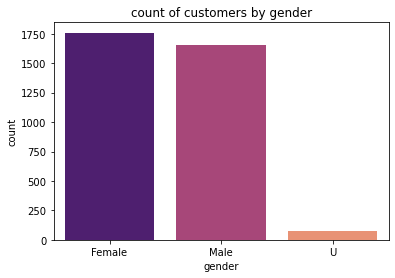

In [42]:
# there are more authorized transactions than posted

sns.countplot(x = 'gender', data = Customers_final, palette = 'magma')
plt.title('count of customers by gender');

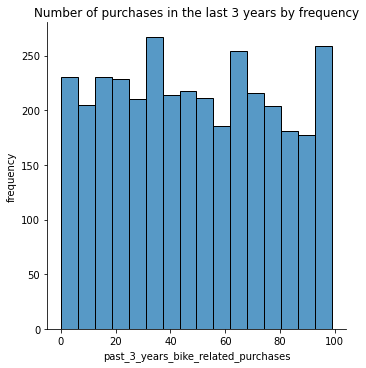

In [43]:
sns.displot(x='past_3_years_bike_related_purchases', data = Customers_final, palette = 'magma')
plt.title('Number of purchases in the last 3 years by frequency')
plt.ylabel('frequency');

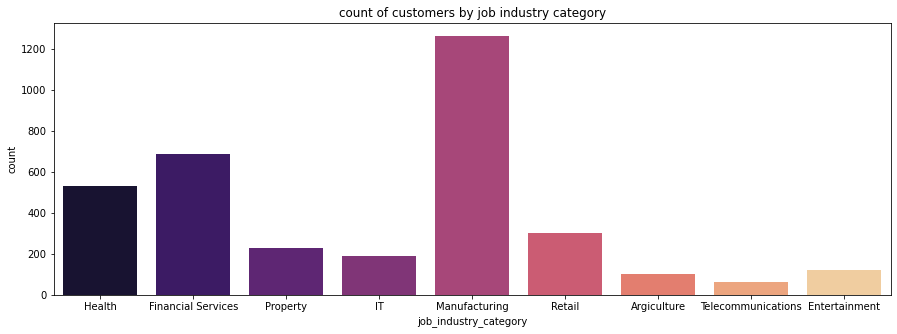

In [44]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, palette = 'magma')
plt.title('count of customers by job industry category');

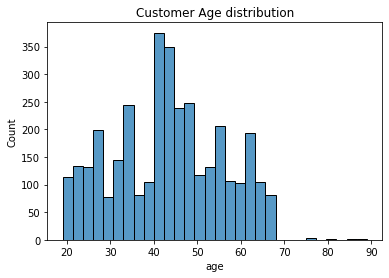

In [45]:
sns.histplot(data = Customers_final , x='age', palette = 'magma')
plt.title('Customer Age distribution');

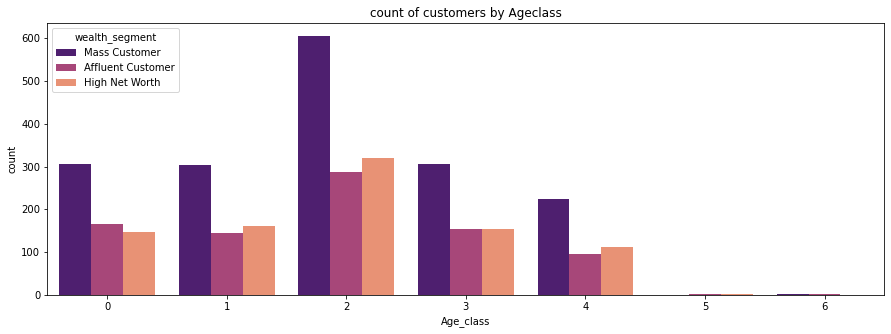

In [46]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'Age_class', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by Ageclass');

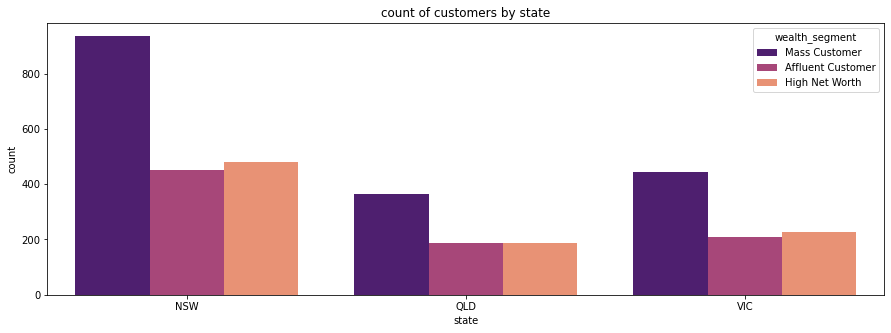

In [47]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'state', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by state');

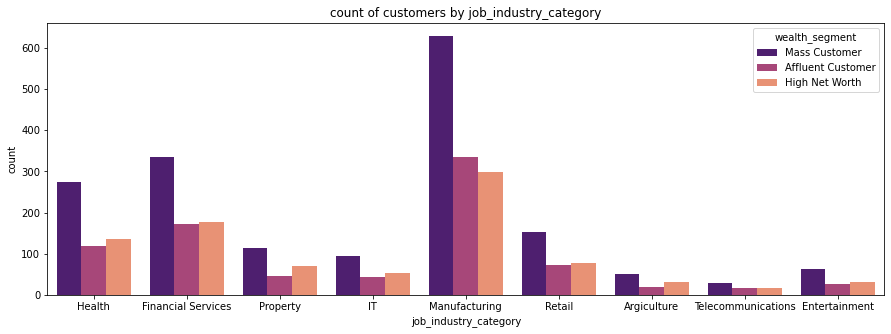

In [48]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='wealth_segment', palette = 'magma')
plt.title('count of customers by job_industry_category');

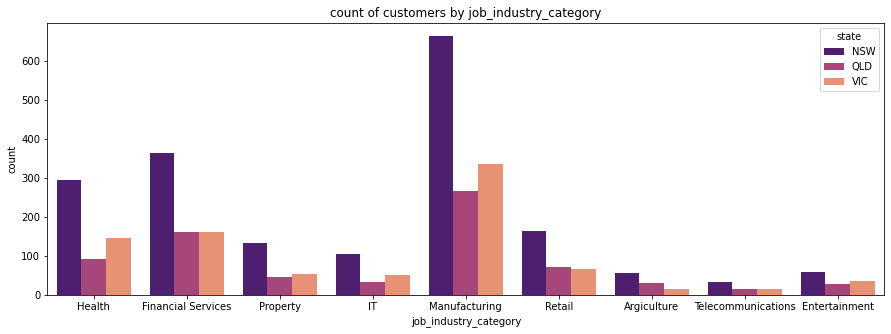

In [49]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='state', palette = 'magma')
plt.title('count of customers by job_industry_category');

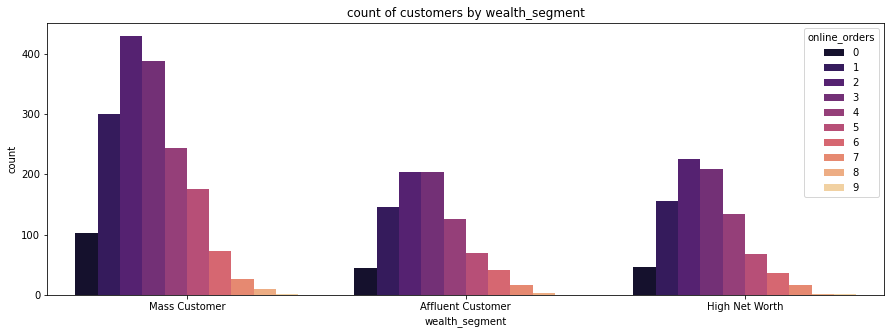

In [50]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'wealth_segment', data = Customers_final, hue='online_orders', palette = 'magma')
plt.title('count of customers by wealth_segment');

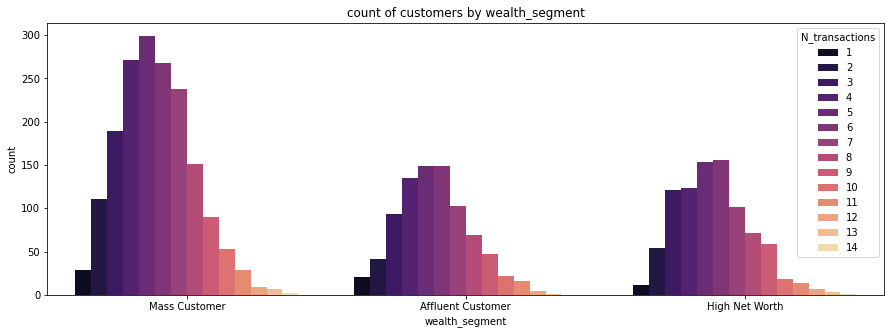

In [51]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'wealth_segment', data = Customers_final, hue='N_transactions', palette = 'magma')
plt.title('count of customers by wealth_segment');

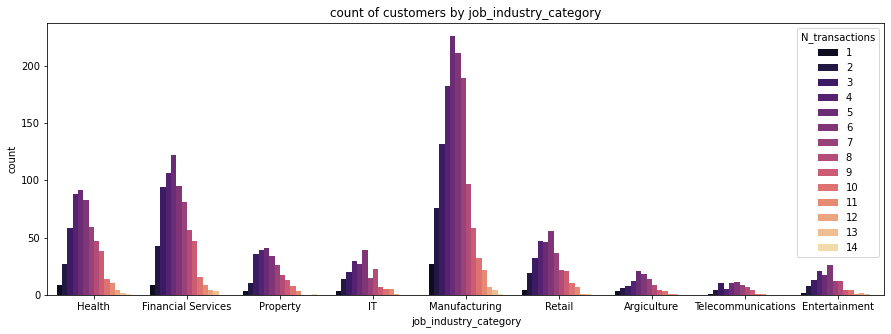

In [52]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'job_industry_category', data = Customers_final, hue='N_transactions', palette = 'magma')
plt.title('count of customers by job_industry_category');

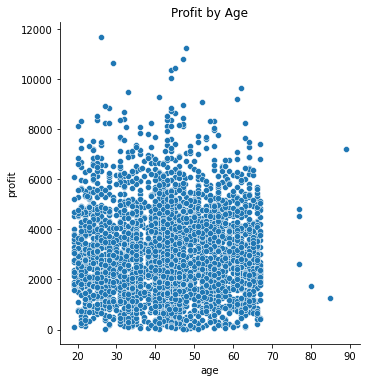

In [53]:
sns.relplot(y='profit', x='age' ,data=Customers_final, palette = 'magma' )
plt.title('Profit by Age');

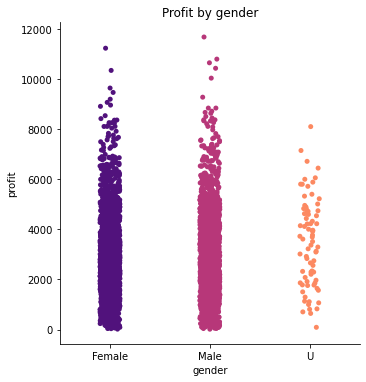

In [54]:
sns.catplot(y='profit', x='gender', data=Customers_final, palette = 'magma' )
plt.title('Profit by gender');

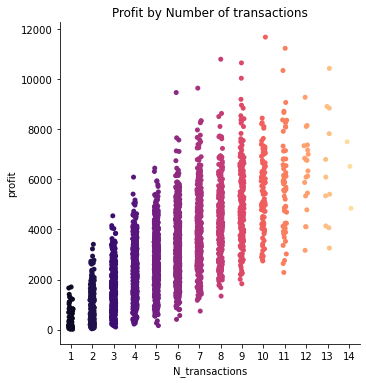

In [55]:
sns.catplot(y='profit', x='N_transactions', data=Customers_final, palette = 'magma' )
plt.title('Profit by Number of transactions');

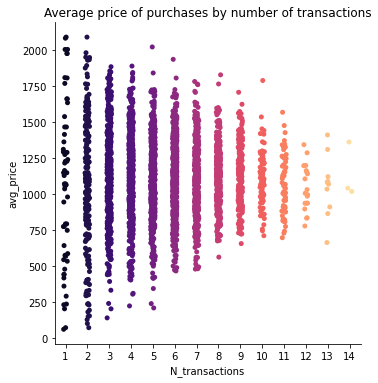

In [56]:
sns.catplot(y='avg_price', x='N_transactions', data=Customers_final, palette = 'magma' )
plt.title('Average price of purchases by number of transactions');

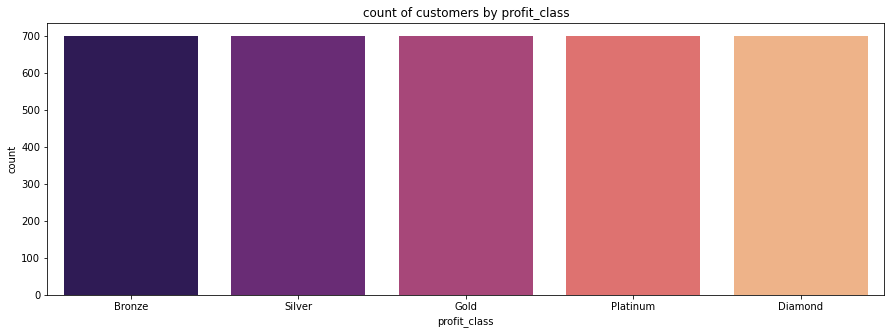

In [57]:
plt.figure(figsize=[15, 5])
sns.countplot(x = 'profit_class', data = Customers_final, palette = 'magma')
plt.title('count of customers by profit_class');

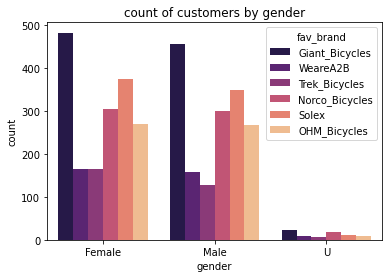

In [58]:
sns.countplot(x = 'gender', hue='fav_brand', data = Customers_final, palette = 'magma')
plt.title('count of customers by gender');

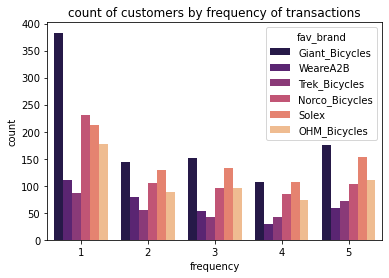

In [59]:
sns.countplot(x = 'frequency', hue='fav_brand', data = Customers_final, palette = 'magma')
plt.title('count of customers by frequency of transactions');

In [60]:
#Storing the clean DataFrame in a CSV file called twitter_master
Customers_final.to_csv('Customers_final.csv', index=False)

## Modeling

In [61]:
Customers_final = pd.read_csv('Customers_final.csv')

In [62]:
Customers_final.head()

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,...,low_class,medium_class,large_size,medium_size,small_size,earliest_purchase_days_ago,profit_class,frequency,recency,fav_brand
0,Female,93.0,Executive Secretary,Health,Mass Customer,0.0,1.0,11.0,2016.0,NSW,...,2,8,0,9,2,359,Gold,5,5,Giant_Bicycles
1,Male,81.0,Administrative Officer,Financial Services,Mass Customer,0.0,1.0,16.0,2153.0,NSW,...,0,3,0,3,0,240,Silver,1,1,WeareA2B
2,Male,61.0,Recruiting Manager,Property,Mass Customer,0.0,1.0,15.0,2170.0,NSW,...,2,4,3,2,2,310,Gold,4,2,Trek_Bicycles
3,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,0.0,7.0,4211.0,QLD,...,0,2,1,1,0,271,Bronze,1,1,Giant_Bicycles
4,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,0.0,1.0,8.0,2448.0,NSW,...,2,3,2,2,2,302,Silver,3,4,Norco_Bicycles


In [63]:
Customers_final.drop(['job_title','fav_brand'], axis = 1 , inplace=True)

In [64]:
Customers_final.drop(Customers_final.index[3490], inplace=True)

In [65]:
Customers_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3489
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3490 non-null   object 
 1   past_3_years_bike_related_purchases  3490 non-null   float64
 2   job_industry_category                3490 non-null   object 
 3   wealth_segment                       3490 non-null   object 
 4   deceased_indicator                   3490 non-null   float64
 5   owns_car                             3490 non-null   float64
 6   tenure                               3490 non-null   float64
 7   postcode                             3490 non-null   float64
 8   state                                3490 non-null   object 
 9   property_valuation                   3490 non-null   float64
 10  age                                  3490 non-null   float64
 11  month                         

In [66]:
Customers_final['profit_class'].value_counts().max()/len(Customers_final)

0.2002865329512894

In [67]:
features = Customers_final.drop(['profit_class'], axis=1)
Target = Customers_final['profit_class']

In [68]:
features = pd.get_dummies(features, drop_first=True)
features.shape

(3490, 49)

In [69]:
Target.shape

(3490,)

In [70]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [71]:
X_test, X_train, y_test, y_train = train_test_split(features, Target, test_size=0.5, stratify=Target, random_state=2018)

In [72]:
print(f'Shape of X train: {X_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print(f'Shape of X test: {X_test.shape}')
print(f'Shape of y test: {y_test.shape}')

Shape of X train: (1745, 49)
Shape of y train: (1745,)
Shape of X test: (1745, 49)
Shape of y test: (1745,)


In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

## Gridsearch

In [74]:
lr = LogisticRegression()
cross_val_score(lr, X_train_ss, y_train, cv=5).mean()

C:\Users\moni kolli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moni kolli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

0.8865329512893982

In [75]:
predictions = cross_val_predict(lr, X_train_ss, y_train, cv=5)

C:\Users\moni kolli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\moni kolli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [76]:
confusion = confusion_matrix(y_test,predictions)
pd.DataFrame(confusion,columns=sorted(y_train.unique()),index=sorted(y_train.unique()))

,Bronze,Diamond,Gold,Platinum,Silver
Bronze,64,68,70,80,67
Diamond,58,67,73,74,77
Gold,79,68,76,63,63
Platinum,75,74,59,58,83
Silver,68,68,75,72,66


In [77]:
params={'penalty':['l1','l2'],
                 'solver':['liblinear'],
                 'C':np.logspace(-3,0,50)}

In [78]:
gs=GridSearchCV(LogisticRegression(),
                      params,
                      n_jobs=-1,cv=5)

In [79]:
gs.fit(X_train_ss,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [80]:
gs.best_params_

{'C': 0.28117686979742307, 'penalty': 'l1', 'solver': 'liblinear'}

In [81]:
best_logreg = gs.best_estimator_

In [82]:
best_logreg.score(X_test_ss,y_test)

0.7553008595988538

In [83]:
predictions = best_logreg.predict(X_test_ss)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Bronze       0.94      0.99      0.96       349
     Diamond       0.91      1.00      0.95       349
        Gold       0.48      0.52      0.50       349
    Platinum       0.77      0.62      0.69       349
      Silver       0.67      0.64      0.66       349

    accuracy                           0.76      1745
   macro avg       0.75      0.76      0.75      1745
weighted avg       0.75      0.76      0.75      1745



## Logisticregression CV

In [84]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [85]:
lr_cv = LogisticRegressionCV(Cs = np.logspace(-3,0,50), fit_intercept = True, cv = 5, penalty = 'l1',\
                             scoring = 'f1', solver = 'liblinear', n_jobs = -1,\
                             random_state = 1)

In [86]:
lr_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
       0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
       0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
       0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
       0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
       0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
       0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
       0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
       0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
       0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
                     cv=5, n_jobs=-1, penalty='l1', random_state=1,
                     scoring='f1', solver='liblinear')

In [87]:
print(lr_cv.classes_, '\n')
print(lr_cv.coef_, '\n')
print(lr_cv.intercept_, '\n')

['Bronze' 'Diamond' 'Gold' 'Platinum' 'Silver'] 

[[ 8.35092163e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.24202552e-03  3.16524987e-01  1.33798983e-01 -1.16774052e-02
  -1.41461437e+00  4.64532740e-01  1.36234572e-01  0.00000000e+00
   2.45479186e-03 -9.23917988e-04 -2.21252575e-02  1.75645472e-02
   5.89053219e-01  2.99846565e-01  0.00000000e+00 -6.17012181e-02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.23284749e-01  0.00000000e+00  5.96673860e-02  2.32124693e-01
   0.00000000e+00  1.61402564e-01  7.24005716e-01  0.00000000e+00
   4.18252252e-04 -8.42854003e-01  8.65508881e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -7.31256699e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.92484585e-01 -7.57088379e-01
   1.00245797e-01]
 [-8.06678688e-03  0.00000000e+00 -7.21452177e-02 -1.79125228e-02
  -1.69894849e-03 -2.01024488e-01 -1.20630819e-01 -1.08803752e-01
   1.14

In [88]:
cross_val_score(lr_cv, X_test, y_test, scoring = 'f1_micro')

array([0.74498567, 0.76504298, 0.73638968, 0.70200573, 0.72206304])

In [89]:
y_pred = lr_cv.predict(X_test)

In [90]:
print(accuracy_score(y_test, y_pred), '\n')
print(confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

0.7530085959885386 

[[341   0   3   0   5]
 [  0 344   1   4   0]
 [  0   0 178  66 105]
 [  0  26  95 222   6]
 [  6   0 110   4 229]] 

              precision    recall  f1-score   support

      Bronze       0.98      0.98      0.98       349
     Diamond       0.93      0.99      0.96       349
        Gold       0.46      0.51      0.48       349
    Platinum       0.75      0.64      0.69       349
      Silver       0.66      0.66      0.66       349

    accuracy                           0.75      1745
   macro avg       0.76      0.75      0.75      1745
weighted avg       0.76      0.75      0.75      1745

